In [6]:
from ShazamAPI import Shazam
file = 'blues.00032.wav'
mp3_file_content_to_recognize = open(file, 'rb').read()

shazam = Shazam(mp3_file_content_to_recognize)
recognize_generator = shazam.recognizeSong()

# Get the first result from the generator
result = next(recognize_generator)

# Get the dictionary from the tuple
result_dict = result[1]
result_dict

{'matches': [],
 'tagid': '49FA6887-3B39-4123-A574-9247DA20B93D',
 'retryms': 9000}

In [29]:

# Get the song name
song_name = result_dict['track']['title']
artist = result_dict['track']['subtitle']
# Get the sections
sections = result_dict['track']['sections']

# Find the lyrics section and extract the lyrics
lyrics = None
for section in sections:
    if section['type'] == 'LYRICS':
        lyrics = "\n".join(section['text'])
        break

if lyrics:
    print("Song name:", song_name)
    print("\nLyrics:")
    print(lyrics)
else:
    print("Lyrics not found")
print(artist)

Song name: Lucky

Lyrics:
This is a story about a girl named Lucky

Early morning, she wakes up
Knock, knock, knock on the door
It's time for makeup, perfect smile
It's you they're all waiting for

They go
"Isn't she lovely, this Hollywood girl?"
And they say

She's so lucky, she's a star
But she cry-cry-cries in her lonely heart, thinking
If there's nothing missing in my life
Then why do these tears come at night?

Lost in an image, in a dream
But there's no one there to wake her up
And the world is spinning, and she keeps on winnin'
But tell me what happens when it stops?

They go
"Isn't she lovely, this Hollywood girl?"
And they say

She's so lucky, she's a star
But she cry-cry-cries in her lonely heart, thinking
If there's nothing missing in my life
Then why do these tears come at night?

("Best actress, and the winner is... Lucky!")

("I'm Roger Johnson from Pop News standing outside the arena waiting for Lucky!
Oh my God, here she comes!")

Isn't she lovely, this Hollywood girl?


In [67]:
import os
import glob
import librosa
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Set up the paths
data_dir = '/Users/ayush/Documents/Data/songs/blues'
train_size = 70
test_size = 30

# Set up the training and testing datasets
train_lyrics = []
train_labels = []
test_lyrics = []
test_labels = []

# Loop through the first 30 songs in the directory for training
for i, file_path in enumerate(glob.glob(os.path.join(data_dir, '*.wav'))):
    if i >= train_size + test_size:
        break
    print(f'Processing {file_path}')
    
    # Load the audio file using librosa
    y, sr = librosa.load(file_path)
    # Convert the audio file to mp3
    mp3_file_content_to_recognize = open(file_path, 'rb').read()
#     mp3_file_content_to_recognize = librosa.util.buf_to_float(y).astype('float32')
    shazam = Shazam(mp3_file_content_to_recognize)
    # Get the lyrics from the audio file
    try:
        recognize_generator = shazam.recognizeSong()
        result = next(recognize_generator)
        result_dict = result[1]
        sections = result_dict['track']['sections']
        lyrics = None
        for section in sections:
            if section['type'] == 'LYRICS':
                lyrics = "\n".join(section['text'])
                break
        if lyrics:
            if i < train_size:
                train_lyrics.append(lyrics)
                train_labels.append('blues')
            else:
                test_lyrics.append(lyrics)
                test_labels.append('blues')
        else:
            print(f"No lyrics found for {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_lyrics)
X_test = vectorizer.transform(test_lyrics)



# Train a Naive Bayes classifier on the training dataset
clf = MultinomialNB()
clf.fit(X_train, train_labels)

# Test the classifier on the testing dataset
y_pred = clf.predict(X_test)
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy on testing dataset: {accuracy}")

# Save the classifier object to disk
joblib.dump(clf, 'classifier.joblib')

# Save the vectorizer object to disk
joblib.dump(vectorizer, 'vectorizer.joblib')

Processing /Users/ayush/Documents/Data/songs/blues/blues.00093.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00093.wav: 'track'
Processing /Users/ayush/Documents/Data/songs/blues/blues.00087.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00087.wav: 'track'
Processing /Users/ayush/Documents/Data/songs/blues/blues.00050.wav
No lyrics found for /Users/ayush/Documents/Data/songs/blues/blues.00050.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00044.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00078.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00079.wav
No lyrics found for /Users/ayush/Documents/Data/songs/blues/blues.00079.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00045.wav
No lyrics found for /Users/ayush/Documents/Data/songs/blues/blues.00045.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00051.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00051.wav

Processing /Users/ayush/Documents/Data/songs/blues/blues.00014.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00015.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00001.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00029.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00029.wav: 'track'
Processing /Users/ayush/Documents/Data/songs/blues/blues.00017.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00003.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00002.wav
Processing /Users/ayush/Documents/Data/songs/blues/blues.00016.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00016.wav: 'track'
Processing /Users/ayush/Documents/Data/songs/blues/blues.00071.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00071.wav: 'track'
Processing /Users/ayush/Documents/Data/songs/blues/blues.00065.wav
Error processing /Users/ayush/Documents/Data/songs/blues/blues.00065.wav: 'track'
Pr

['classifier.joblib']

In [71]:
# import os
# import librosa
# from ShazamAPI import Shazam
# import joblib

# # Set up the paths
# data_dir = '/Users/ayush/Documents/Data/songs/pop'

# # Load the trained classifier from file
# clf = joblib.load('classifier.joblib')

# # Load the trained vectorizer from file
# vectorizer = joblib.load('vectorizer.joblib')

# # Set up counters for processed and blues songs
# processed_count = 0
# blues_count = 0

# # Loop through all the .wav files in the directory
# for file_path in os.listdir(data_dir):
#     if not file_path.endswith('.wav'):
#         continue
#     print(f'Processing {file_path}')
    
#     # Load the audio file using librosa
#     audio_file_path = os.path.join(data_dir, file_path)
#     y, sr = librosa.load(audio_file_path)
    
#     # Use the ShazamAPI library to extract the lyrics from the audio file
#     mp3_file_content_to_recognize = open(audio_file_path, 'rb').read()
#     shazam = Shazam(mp3_file_content_to_recognize)
#     recognize_generator = shazam.recognizeSong()
#     result = next(recognize_generator)
#     result_dict = result[1]
#     sections = result_dict['track']['sections']
#     lyrics = None
#     for section in sections:
#         if section['type'] == 'LYRICS':
#             lyrics = "\n".join(section['text'])
#             break
    
#     # If lyrics were retrieved from the audio file, classify the song
#     if lyrics:
#         processed_count += 1
        
#         # Preprocess the text data using the loaded vectorizer
#         X = vectorizer.transform([lyrics])
        
#         # Use the trained classifier to predict the label
#         y_pred = clf.predict(X)
#         if y_pred[0] == 'blues':
#             blues_count += 1
#             print(f"{file_path} is a blues song.")
#         else:
#             print(f"{file_path} is not a blues song.")
#     else:
#         print(f"No lyrics found for {file_path}")

# print(f"Processed {processed_count} songs, {blues_count} of which were classified as blues.")


In [7]:
import os
from ShazamAPI import Shazam
import json

# Set up the paths
data_dir = '/Users/ayush/Documents/Data/songs/hiphop'

# Set up the lyrics dictionary
lyrics_dict = {}

# Loop through all the .wav files in the directory
for file_path in os.listdir(data_dir):
    if file_path.endswith('.wav'):
        print(f'Processing {file_path}')
        
        # Load the audio file using librosa
        y, sr = librosa.load(os.path.join(data_dir, file_path))
        
        # Check if the lyrics have already been extracted and stored
        if file_path in lyrics_dict:
            continue
        
        # Use the ShazamAPI library to extract the lyrics from the audio file
        mp3_file_content_to_recognize = open(os.path.join(data_dir, file_path), 'rb').read()
        shazam = Shazam(mp3_file_content_to_recognize)
        recognize_generator = shazam.recognizeSong()
        result = next(recognize_generator)
        result_dict = result[1]
        
        # Check if the result contains metadata for the song
        if 'track' not in result_dict:
            print(f"No metadata found for {file_path}")
            continue
        
        sections = result_dict['track']['sections']
        lyrics = None
        for section in sections:
            if section['type'] == 'LYRICS':
                lyrics = "\n".join(section['text'])
                break
        
        # Store the lyrics in the dictionary
        if lyrics:
            lyrics_dict[file_path] = {
                'lyrics': lyrics,
                'label': 'pop'
            }
        else:
            print(f"No lyrics found for {file_path}")

# Save the lyrics dictionary to a JSON file
with open('hiphop_lyrics.json', 'w') as f:
    json.dump(lyrics_dict, f)


Processing hiphop.00022.wav
Processing hiphop.00036.wav
Processing hiphop.00037.wav
No lyrics found for hiphop.00037.wav
Processing hiphop.00023.wav
Processing hiphop.00009.wav
Processing hiphop.00035.wav
No lyrics found for hiphop.00035.wav
Processing hiphop.00021.wav
Processing hiphop.00020.wav
Processing hiphop.00034.wav
Processing hiphop.00008.wav
Processing hiphop.00030.wav
No metadata found for hiphop.00030.wav
Processing hiphop.00024.wav
No lyrics found for hiphop.00024.wav
Processing hiphop.00018.wav
Processing hiphop.00019.wav
Processing hiphop.00025.wav
Processing hiphop.00031.wav
Processing hiphop.00027.wav
No metadata found for hiphop.00027.wav
Processing hiphop.00033.wav
Processing hiphop.00032.wav
No lyrics found for hiphop.00032.wav
Processing hiphop.00026.wav
No lyrics found for hiphop.00026.wav
Processing hiphop.00069.wav
Processing hiphop.00041.wav
Processing hiphop.00055.wav
Processing hiphop.00082.wav
Processing hiphop.00096.wav
No metadata found for hiphop.00096.wa

In [10]:
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

# Load the lyrics and labels for the blues songs
with open('blues_lyrics.json', 'r') as f:
    blues_data = json.load(f)

blues_lyrics = [d['lyrics'] for d in blues_data.values()]
blues_labels = [d['label'] for d in blues_data.values()]

# Load the lyrics and labels for the pop songs
with open('pop_lyrics.json', 'r') as f:
    pop_data = json.load(f)

pop_lyrics = [d['lyrics'] for d in pop_data.values()]
pop_labels = [d['label'] for d in pop_data.values()]

# Load the lyrics and labels for the rock songs
with open('rock_lyrics.json', 'r') as f:
    rock_data = json.load(f)

rock_lyrics = [d['lyrics'] for d in rock_data.values()]
rock_labels = [d['label'] for d in rock_data.values()]

# Load the lyrics and labels for the rock songs
with open('hiphop_lyrics.json', 'r') as f:
    rock_data = json.load(f)

hiphop_lyrics = [d['lyrics'] for d in rock_data.values()]
hiphop_labels = [d['label'] for d in rock_data.values()]

# Combine the lyrics and labels for all genres
all_lyrics = blues_lyrics + pop_lyrics + rock_lyrics + hiphop_lyrics
all_labels = blues_labels + pop_labels + rock_labels + hiphop_lyrics

# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_lyrics)

# Train a Naive Bayes classifier on the dataset
clf = MultinomialNB()
clf.fit(X, all_labels)

# Test the classifier on a subset of the dataset
test_lyrics = blues_lyrics[:10] + pop_lyrics[:10] + rock_lyrics[:10] + hiphop_lyrics[:10]
test_labels = blues_labels[:10] + pop_labels[:10] + rock_labels[:10] + hiphop_lyrics[:10]
X_test = vectorizer.transform(test_lyrics)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy on testing dataset: {accuracy}")

# Save the classifier object to disk
joblib.dump(clf, 'classifier.joblib')

# Save the vectorizer object to disk
joblib.dump(vectorizer, 'vectorizer.joblib')

Accuracy on testing dataset: 0.8


['vectorizer.joblib']

Processing /Users/ayush/Documents/Data/Test/blues/14 Bob Marley And The Wailers - Thank You Lord.flac
Processing /Users/ayush/Documents/Data/Test/blues/08 Bob Marley And The Wailers - 400 Years.flac
Processing /Users/ayush/Documents/Data/Test/blues/You Are So Beautiful.flac
Processing /Users/ayush/Documents/Data/Test/blues/03 Sandy_s Blues.flac
Processing /Users/ayush/Documents/Data/Test/blues/05 Bob Marley And The Wailers - Soon Come.flac
Processing /Users/ayush/Documents/Data/Test/blues/Feeling Alright.flac
Processing /Users/ayush/Documents/Data/Test/blues/02 - BB_No Good.flac
Processing /Users/ayush/Documents/Data/Test/blues/High time we went.flac
Processing /Users/ayush/Documents/Data/Test/blues/05 Walking By Myself.flac
Processing /Users/ayush/Documents/Data/Test/blues/06 Boogie Music.flac
Processing /Users/ayush/Documents/Data/Test/blues/06 Bob Marley And The Wailers - Corner Stone.flac
Processing /Users/ayush/Documents/Data/Test/blues/13 Bob Marley And The Wailers - Mr. Chatterb

/var/folders/sc/_1ph4jld3y3gtyp1j08f98980000gn/T/ipykernel_30400/1568619385.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/Users/ayush/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processing /Users/ayush/Documents/Data/Test/pop/07. TS_Seven.flac
Processing /Users/ayush/Documents/Data/Test/pop/16. TS_Hoax.flac
Processing /Users/ayush/Documents/Data/Test/pop/01 - Never Really Over.flac
Processing /Users/ayush/Documents/Data/Test/pop/08 - Doubt.flac
Processing /Users/ayush/Documents/Data/Test/pop/02. TS_Cardigan.flac
Processing /Users/ayush/Documents/Data/Test/pop/11 - Only Love.flac
Processing /Users/ayush/Documents/Data/Test/pop/03 - Teary Eyes.flac
Processing /Users/ayush/Documents/Data/Test/pop/09. TS_This Is Me Trying.flac
Processing /Users/ayush/Documents/Data/Test/pop/08. TS_August.flac
Processing /Users/ayush/Documents/Data/Test/pop/02 - Cry About It Later.flac
Processing /Users/ayush/Documents/Data/Test/pop/03. TS_The Last Great American Dynasty.flac
Processing /Users/ayush/Documents/Data/Test/rock/09. Wicked Ways.flac
Processing /Users/ayush/Documents/Data/Test/rock/10 - Live and Let Die.flac
Processing /Users/ayush/Documents/Data/Test/rock/02 BS_After Fo

Processing /Users/ayush/Documents/Data/Test/classical/102_Beethoven_-_Egmont_Op_84_Overture.flac
Processing /Users/ayush/Documents/Data/Test/classical/JohannSebastianBach-24-GoldbergVariationsBwv.988-Variation23.flac
Processing /Users/ayush/Documents/Data/Test/classical/105_Beethoven_-_Violin_Concerto_in_D_major_Op_61_III_Rondo_Allegro.flac
Processing /Users/ayush/Documents/Data/Test/classical/JohannSebastianBach-22-GoldbergVariationsBwv.988-Variation21.CanonOnTheSeventh.flac
Processing /Users/ayush/Documents/Data/Test/classical/JohannSebastianBach-08-GoldbergVariationsBwv.988-Variation7.flac
Processing /Users/ayush/Documents/Data/Test/classical/201_Beethoven_-_Symphony_No_3_in_E_flat_major_Op_55_Eroica_III_Scherzo_Allegro_vivace.flac
Processing /Users/ayush/Documents/Data/Test/classical/JohannSebastianBach-14-GoldbergVariationsBwv.988-Variation13.flac
Processing /Users/ayush/Documents/Data/Test/classical/JohannSebastianBach-17-GoldbergVariationsBwv.988-Variation16.Overture.flac
Proces

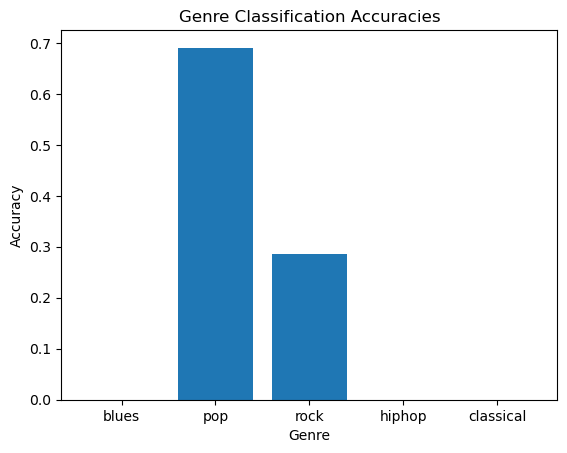

In [12]:
import os
import glob
import librosa
import numpy as np
import joblib
import matplotlib.pyplot as plt
from ShazamAPI import Shazam

# Set up the paths
data_dir = '/Users/ayush/Documents/Data/Test'
genres = ['blues', 'pop', 'rock', 'hiphop', 'classical']

# Load the trained vectorizer and classifier from files
vectorizer = joblib.load('vectorizer.joblib')
clf = joblib.load('classifier.joblib')

# Initialize counters for correctly classified songs
correctly_classified = {genre: 0 for genre in genres}
total_songs = {genre: 0 for genre in genres}

# Loop through each genre folder
for genre in genres:
    genre_dir = os.path.join(data_dir, genre)

    # Loop through all the .flac files in the genre directory
    for file_path in glob.glob(os.path.join(genre_dir, '*.flac')):
        print(f'Processing {file_path}')
        total_songs[genre] += 1

        try:
            # Load the audio file using librosa
            y, sr = librosa.load(file_path)

            # Use the ShazamAPI library to extract the lyrics from the audio file
            mp3_file_content_to_recognize = open(file_path, 'rb').read()
            shazam = Shazam(mp3_file_content_to_recognize)
            recognize_generator = shazam.recognizeSong()
            result = next(recognize_generator)
            result_dict = result[1]
            if 'track' in result_dict:
                sections = result_dict['track']['sections']
                lyrics = None
                for section in sections:
                    if section['type'] == 'LYRICS':
                        lyrics = "\n".join(section['text'])
                        break

            if lyrics is not None:
                # Transform the song's lyrics using the vectorizer object
                X = vectorizer.transform([lyrics])

                # Use the trained classifier to predict the label
                predicted_genre = clf.predict(X)[0]

                # Check if the predicted genre matches the actual genre
                if predicted_genre == genre:
                    correctly_classified[genre] += 1

        except Exception as e:
            print(f"Skipping {file_path} due to error: {e}")

# Calculate accuracies
accuracies = {genre: correctly_classified[genre] / total_songs[genre] for genre in genres}

# Print the results
for genre in genres:
    print(f"{genre.capitalize()} songs: {correctly_classified[genre]} / {total_songs[genre]} ({accuracies[genre] * 100:.2f}%)")

# Plot the accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Genre')
plt.ylabel('Accuracy')
plt.title('Genre Classification Accuracies')
plt.show()
